### Problem 1
Load Breast Cancer dataset (`sklearn.datasets.load_breast_cancer`), implement PCA from scratch on it and plot the corresponding projection color-coded. Do the same with three arbitrary digits subset from *digits* dataset.

Try projecting *digits* dataset with t-SNE (`sklearn.manifold.TSNE`), compare the results.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
import numpy.linalg as la
import sklearn.manifold as mf

In [5]:
data = dataset.load_breast_cancer()
X = data['data']
y = data['target']
print(X.shape)

(569, 30)


In [24]:
def PCA_2D(X):
    A = X - X.mean(axis=0)
    B = A.T @ A
    w, v = la.eig(B)
    return X @ v[:,:2]

In [20]:
X_proj = X @ v[:,:2]
print(X_proj.shape)

(569, 2)


[]

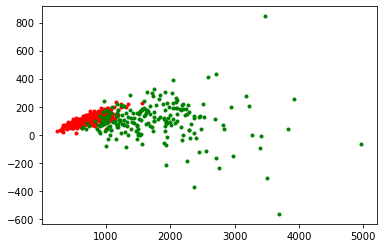

In [23]:
plt.plot(X_proj[y==1,0], X_proj[y==1,1], 'r.')
plt.plot(X_proj[y==0,0], X_proj[y==0,1], 'g.')
plt.plot()

In [25]:
data = dataset.load_digits()
X = data['data']
y = data['target']
print(X.shape)

(1797, 64)


In [26]:
Z = PCA_2D(X)
print(Z.shape)

(1797, 2)


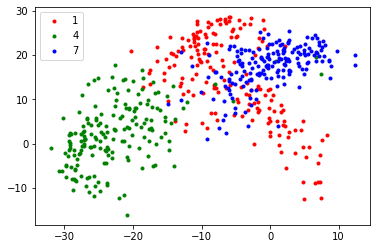

In [31]:
a, b, c = 1, 4, 7
plt.plot(Z[y==a, 0], Z[y==a, 1], 'r.')
plt.plot(Z[y==b, 0], Z[y==b, 1], 'g.')
plt.plot(Z[y==c, 0], Z[y==c, 1], 'b.')
plt.legend([f'{a}', f'{b}', f'{c}'])
plt.show()

In [34]:
tsne = mf.TSNE(n_components=2)
W = tsne.fit_transform(X)

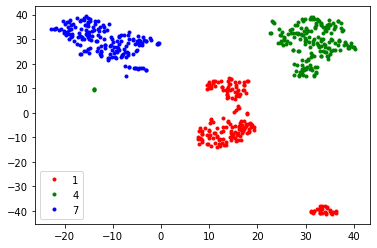

In [35]:
plt.plot(W[y==a, 0], W[y==a, 1], 'r.')
plt.plot(W[y==b, 0], W[y==b, 1], 'g.')
plt.plot(W[y==c, 0], W[y==c, 1], 'b.')
plt.legend([f'{a}', f'{b}', f'{c}'])
plt.show()

In [37]:
print(W[y==a,:])

[[ 17.780909    -0.53510934]
 [ 17.19171     11.269421  ]
 [ 14.73074      9.586483  ]
 [ 17.041935     9.28921   ]
 [ 16.289097     7.8038044 ]
 [ 15.708992     8.527267  ]
 [ 16.175606     6.721957  ]
 [ 15.249164     8.407626  ]
 [ 17.656511     7.947736  ]
 [ 17.260334     9.312228  ]
 [ 17.807825    -0.31105113]
 [ 16.29895     -9.676014  ]
 [ 16.165619    12.603936  ]
 [ 12.386202    12.999734  ]
 [ 15.423272    12.730758  ]
 [ 14.472264    13.56201   ]
 [ 14.056919    11.548565  ]
 [ 13.92233     13.120645  ]
 [ 13.94415     10.507463  ]
 [ 17.302124    12.343022  ]
 [ 14.268378    11.754134  ]
 [ 17.971085    13.05175   ]
 [ 14.606777    13.621162  ]
 [ 15.509387    10.626128  ]
 [ 17.21339     11.291271  ]
 [ 15.515135    11.122907  ]
 [ 12.795511    -7.278011  ]
 [ 10.372076    -2.6917515 ]
 [ 10.241389    -4.342443  ]
 [ 13.034622   -13.124483  ]
 [  7.953782   -12.735361  ]
 [ 17.834799    12.850428  ]
 [ 14.503212    -8.313199  ]
 [ 10.708146    -3.6214492 ]
 [ 10.380269  

In [42]:
idx1 = np.where(W[:,0]==15.396177)[0]
idx2 = np.where(W[:,0]==34.010223)[0]
print(idx1, idx2)

[869] [991]


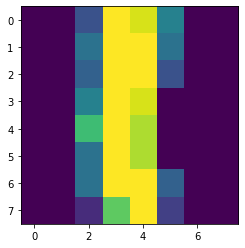

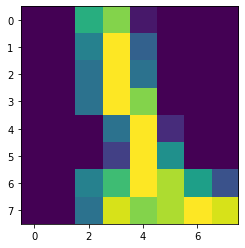

In [43]:
im1 = np.reshape(X[869,:], (8,8))
im2 = np.reshape(X[991,:], (8,8))

plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

### Problem 2
Load Breast Cancer dataset (sklearn.datasets.load_breast_cancer), use implemented PCA (or sklearn PCA `sklearn.decomposition.PCA`) to project the data onto 1D space using some training subset. Build ROC curve, pick appropriate threshold. Calculate classification metrics on test subset.

In [45]:
data = dataset.load_breast_cancer()
D = data['data']
y = data['target']

In [46]:
from sklearn.decomposition import PCA

In [48]:
n = D.shape[0]
test_set = np.random.choice(np.arange(n), int(n*0.25))
train_set = np.setdiff1d(np.arange(n), test_set)
print(train_set, test_set)

[  3   4   6   7   8   9  10  11  12  13  16  17  18  19  20  21  22  23
  24  25  26  27  29  31  32  33  34  35  36  37  38  41  42  43  44  47
  49  52  54  55  56  58  59  60  62  63  64  67  71  72  73  75  77  78
  79  80  81  83  86  87  88  89  91  92  93  96  97  99 101 102 104 106
 107 108 109 110 111 112 113 115 117 119 121 122 123 124 125 126 127 132
 133 134 137 138 139 141 144 145 146 147 149 150 151 152 153 154 156 157
 158 159 160 161 162 163 164 165 166 167 168 170 172 173 174 175 176 177
 178 179 180 181 182 184 185 186 187 189 190 191 192 193 194 195 196 197
 198 199 200 202 203 204 206 207 208 209 210 212 213 214 215 216 217 218
 219 220 221 222 223 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 247 248 249 251 252 253 254 255 256 257 258
 260 261 262 263 264 265 266 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 289 291 292 295 296 297 298 299 300
 303 304 305 306 307 308 310 311 312 314 316 317 31

In [58]:
model = PCA(n_components=1)
model.fit(X[train_set, :])
Z_train = model.transform(X[train_set, :])
Z_test = model.transform(X[test_set, :])

y_train = y[train_set]
y_test = y[test_set]

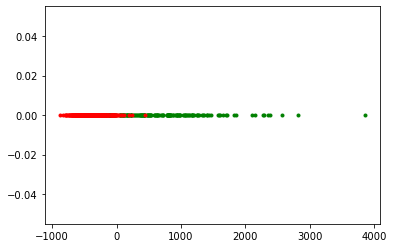

In [59]:
plt.plot(Z_train[y_train==0], np.zeros((Z_train[y_train==0].size, 1)), 'g.')
plt.plot(Z_train[y_train==1], np.zeros((Z_train[y_train==1].size, 1)), 'r.')
plt.show()

In [71]:
t_start, t_end = np.min(Z_test)-1, np.max(Z_test)+1
dt = 1
roc = []
for t in np.arange(t_start, t_end, dt):
    true_positive = np.sum(Z_test[y_test==1] < t)
    true_negative = np.sum(Z_test[y_test==0] >= t)
    false_positive = np.sum(Z_test[y_test==0] < t)
    false_negative = np.sum(Z_test[y_test==1] >= t)
    fpr = false_positive / Z_test.size
    tpr = true_positive / (true_positive + false_negative)
    roc.append([fpr, tpr, t])
    
roc = np.array(roc)

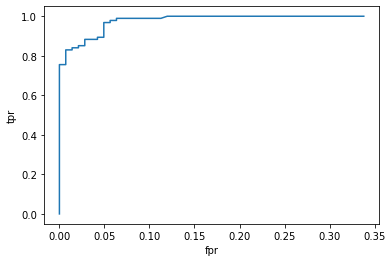

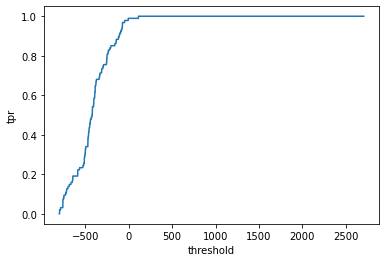

In [72]:
plt.plot(roc[:,0], roc[:,1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
plt.plot(roc[:,2], roc[:,1])
plt.xlabel('threshold')
plt.ylabel('tpr')
plt.show()

### Problem 3
Generate 3 scaled sinusoidal signals of sufficiently large length. Find 5 linear mixtures of these signals using some arbitrary numbers for scale. Perform ICA (sklearn.decomposition.FastICA) on the resulting signal, visually check how close reconstructed components are to the original signals.